In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read in CSV File to see if inputs are right
df = pd.read_csv("finaldata.csv")
df.head()

,Time,Location Hashed,Mean Sea Level Rise,MBSL,MGRD,MIBE,MRes
0,1900.000000,fb3t5ddw3,7011.655440,-122.922944,-65.23750,-26.204083,7103.097023
1,1900.083333,fb3t5ddw3,7023.881174,-133.028206,-64.93125,-8.971881,7097.784305
2,1900.166667,fb3t5ddw3,7021.399124,-69.263509,-64.62500,-16.899310,7102.923434
3,1900.250000,fb3t5ddw3,7013.181308,0.339878,-64.31875,52.904386,7024.595673
4,1900.333333,fb3t5ddw3,7015.986699,25.386330,-64.01250,39.816255,7040.182945


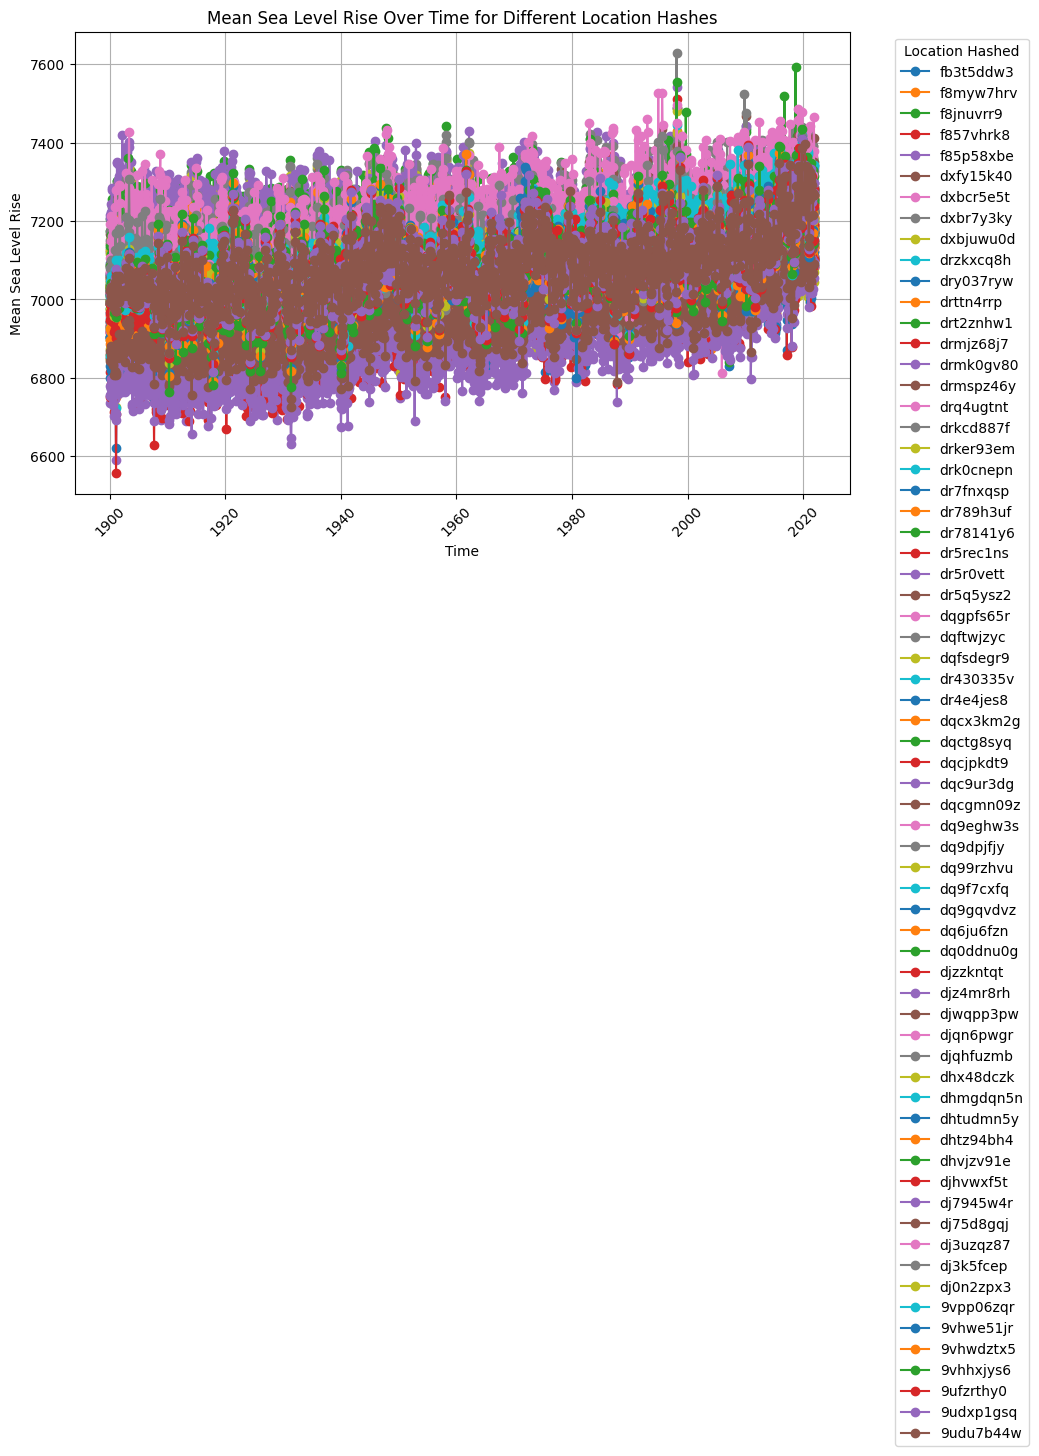

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named "sea_level_data.csv"
# Adjust the filename accordingly if your data is in a different format
file_path = "finaldata.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Get unique location hashes
unique_hashes = data['Location Hashed'].unique()

# Plotting
plt.figure(figsize=(10, 6))
for location_hash in unique_hashes:
    location_data = data[data['Location Hashed'] == location_hash]
    plt.plot(location_data['Time'], location_data['Mean Sea Level Rise'], marker='o', linestyle='-', label=location_hash)

plt.title('Mean Sea Level Rise Over Time for Different Location Hashes')
plt.xlabel('Time')
plt.ylabel('Mean Sea Level Rise')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Location Hashed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Iterate over each unique location hash
for location_hash in unique_hashes:
    # Filter the data based on the location hash
    location_data = data[data['Location Hashed'] == location_hash]

    # Define the filename for the CSV file
    output_file = f"{location_hash}.csv"

    # Save the filtered data to a CSV file
    location_data.to_csv(output_file, index=False)


In [ ]:
dm = pd.read_csv("fb3t5ddw3.csv", index_col='Time')
dm = dm.drop(columns=["Location Hashed"])
dm.head()

,Mean Sea Level Rise,MBSL,MGRD,MIBE,MRes
Time,,,,,
1900.000000,7011.655440,-122.922944,-65.23750,-26.204083,7103.097023
1900.083333,7023.881174,-133.028206,-64.93125,-8.971881,7097.784305
1900.166667,7021.399124,-69.263509,-64.62500,-16.899310,7102.923434
1900.250000,7013.181308,0.339878,-64.31875,52.904386,7024.595673
1900.333333,7015.986699,25.386330,-64.01250,39.816255,7040.182945


In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dm.shape

(1464, 5)

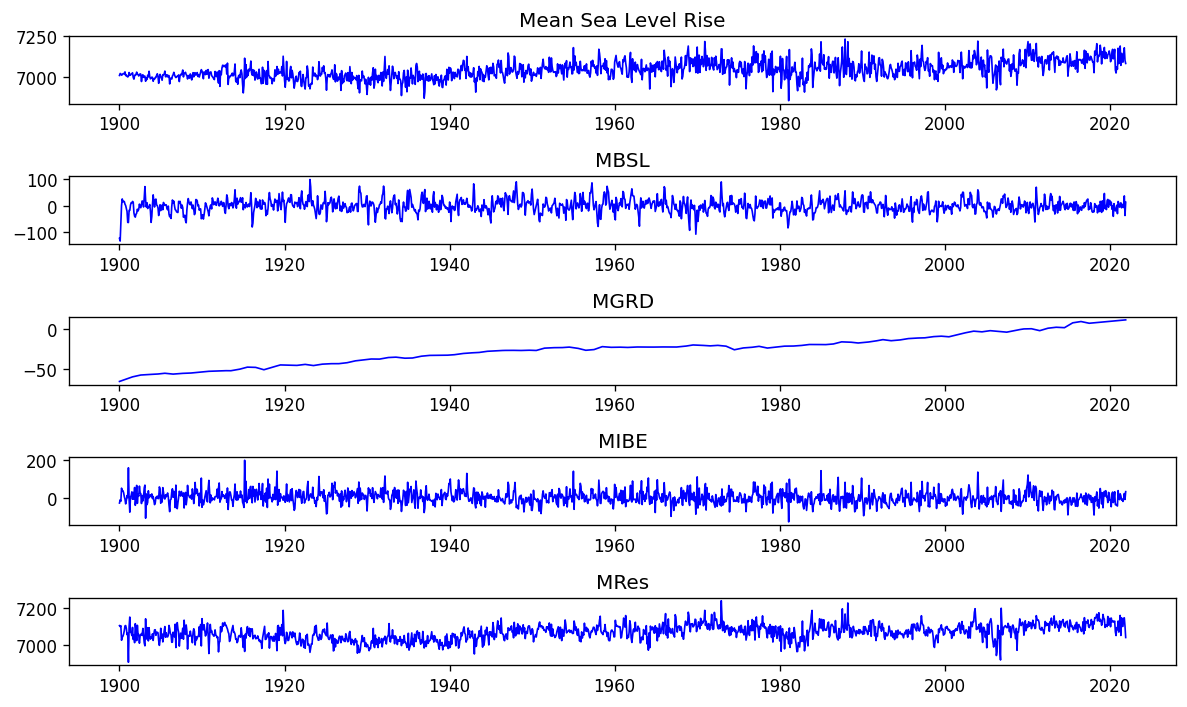

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
  data = dm[dm.columns[i]]
  ax.plot(data, color='blue', linewidth=1)
  ax.set_title(dm.columns[i])
plt.tight_layout();

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

In [ ]:
#Verfies if data is stationary
#p-value <0.05 for it to be stationary
ad_fuller_result_1 = adfuller(dm['Mean Sea Level Rise'])

print('Mean Sea Level Rise')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(dm['MGRD'])

print('MGRD')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Mean Sea Level Rise
ADF Statistic: -3.770758879493946
p-value: 0.003221065795917707

---------------------

MGRD
ADF Statistic: -0.009879933667011006
p-value: 0.9577073558531978


In [ ]:
#covert MGRD to stationary
# Remove missing values from the differenced MGRD data
diff_mgrd = dm['MGRD'].diff()[1:]
diff_mgrd = diff_mgrd.dropna()

# Perform the ADF test on the differenced MGRD data
ad_fuller_result_2change = adfuller(diff_mgrd)

# Print the ADF test results
print('MGRD')
print(f'ADF Statistic: {ad_fuller_result_2change[0]}')
print(f'p-value: {ad_fuller_result_2change[1]}')

MGRD
ADF Statistic: -6.682422264548762
p-value: 4.308720780083251e-09


In [ ]:
#check if MSLR is correlated with MGRD
#p-val less than 0.05 means that lag's causation should be used
print("does mslr cause mgrd")
granger_1 = grangercausalitytests(dm[['Mean Sea Level Rise','MGRD']],4)

does mslr cause mgrd

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=240.8004, p=0.0000  , df_denom=1460, df_num=1
ssr based chi2 test:   chi2=241.2952, p=0.0000  , df=1
likelihood ratio test: chi2=223.3453, p=0.0000  , df=1
parameter F test:         F=240.8004, p=0.0000  , df_denom=1460, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=77.4728 , p=0.0000  , df_denom=1457, df_num=2
ssr based chi2 test:   chi2=155.4773, p=0.0000  , df=2
likelihood ratio test: chi2=147.7532, p=0.0000  , df=2
parameter F test:         F=77.4728 , p=0.0000  , df_denom=1457, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=39.6266 , p=0.0000  , df_denom=1454, df_num=3
ssr based chi2 test:   chi2=119.4521, p=0.0000  , df=3
likelihood ratio test: chi2=114.8197, p=0.0000  , df=3
parameter F test:         F=39.6266 , p=0.0000  , df_denom=1454, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:    

In [ ]:

print("does MGRD cause MSLR")
granger_2 = grangercausalitytests(dm[["MGRD","Mean Sea Level Rise"]], 5)

does MGRD cause MSLR

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4589  , p=0.2273  , df_denom=1460, df_num=1
ssr based chi2 test:   chi2=1.4619  , p=0.2266  , df=1
likelihood ratio test: chi2=1.4612  , p=0.2267  , df=1
parameter F test:         F=1.4589  , p=0.2273  , df_denom=1460, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6009  , p=0.5485  , df_denom=1457, df_num=2
ssr based chi2 test:   chi2=1.2059  , p=0.5472  , df=2
likelihood ratio test: chi2=1.2054  , p=0.5473  , df=2
parameter F test:         F=0.6009  , p=0.5485  , df_denom=1457, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4260  , p=0.7344  , df_denom=1454, df_num=3
ssr based chi2 test:   chi2=1.2841  , p=0.7329  , df=3
likelihood ratio test: chi2=1.2835  , p=0.7330  , df=3
parameter F test:         F=0.4260  , p=0.7344  , df_denom=1454, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:    

In [ ]:
#should use lag of 1 for mslr and lag of 5 for mgrd
dm = dm[['Mean Sea Level Rise','MBSL', 'MGRD', 'MIBE']]
print(dm.shape)

(1464, 4)


In [ ]:
from sklearn import model_selection as sk
train_data, test_data = sk.train_test_split(dm, train_size = 0.8, shuffle=False)
print(train_data.shape)
print(test_data.shape)

(1171, 4)
(293, 4)


In [ ]:
#Experimenting to find lags
traindiff = train_data.diff()[1:]
traindiff.dropna(inplace=True) #drops all NaN values
model = VAR(traindiff)

In [ ]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        16.95       16.97   2.295e+07       16.96
1        14.64       14.72   2.274e+06       14.67
2        14.30       14.46   1.627e+06       14.36
3        14.21       14.44   1.480e+06       14.29
4        14.08      14.38*   1.300e+06       14.19
5        14.05       14.41   1.260e+06       14.19
6        14.04       14.47   1.246e+06       14.20
7        14.00       14.51   1.206e+06       14.19
8        13.96       14.54   1.152e+06       14.18
9        13.93       14.58   1.120e+06      14.17*
10       13.92       14.64   1.109e+06       14.19
11       13.91       14.70   1.100e+06       14.21
12       13.91       14.77   1.102e+06       14.24
13      13.82*       14.75  1.008e+06*       14.17
14       13.83       14.83   1.016e+06       14.21
15       13.83       14.91   1.020e+06       14.24
16       13.84       14.98   1.

In [ ]:
#use 13 lags as results show

In [ ]:
final_var = VARMAX(train_data, order=(13,0), enforce_stationarity = True)
final_fitted = final_var.fit(disp=False)
print(final_fitted.summary)

<bound method VARMAXResults.summary of <statsmodels.tsa.statespace.varmax.VARMAXResults object at 0x7beab3482320>>


In [ ]:
forecastnum = 293
predict = final_fitted.get_prediction(start = len(train_data), end = len(train_data) + forecastnum - 1)
predictions = predict.predicted_mean
predictions.columns = ["MSLR Predicted", "MBSL Predicted", "MGRD Predicted", "MIBE Predicted"]
print(predictions)

      MSLR Predicted  MBSL Predicted  MGRD Predicted  MIBE Predicted
1171     7076.991248       -8.829500      -11.091171      -10.407903
1172     7083.147039        0.911655      -11.094623       -1.774640
1173     7073.261393       -6.907494      -11.114844       -4.705943
1174     7085.854676       -5.101741      -11.144076       -1.707642
1175     7083.866562        3.774716      -11.182620        4.733557
...              ...             ...             ...             ...
1459     7057.833990        0.242147      -19.106798        0.429764
1460     7057.796600        0.241976      -19.127511        0.438136
1461     7057.759271        0.241806      -19.148190        0.446494
1462     7057.722004        0.241635      -19.168836        0.454838
1463     7057.684798        0.241466      -19.189448        0.463169

[293 rows x 4 columns]


In [ ]:
dz = pd.read_csv("fb3t5ddw3.csv")
dz = dz[1171:]
dz = dz[["Time"]]
finalprediction = pd.concat([dz.reset_index(drop = True), predictions.reset_index(drop = True)], axis = 1)
finalprediction.set_index("Time", inplace = True)
finalprediction.head()

,MSLR Predicted,MBSL Predicted,MGRD Predicted,MIBE Predicted
Time,,,,
1997.583333,7076.991248,-8.829500,-11.091171,-10.407903
1997.666667,7083.147039,0.911655,-11.094623,-1.774640
1997.750000,7073.261393,-6.907494,-11.114844,-4.705943
1997.833333,7085.854676,-5.101741,-11.144076,-1.707642
1997.916667,7083.866562,3.774716,-11.182620,4.733557


In [ ]:
pd.to_datetime(dz["Time"])

1171   1970-01-01 00:00:00.000001997
1172   1970-01-01 00:00:00.000001997
1173   1970-01-01 00:00:00.000001997
1174   1970-01-01 00:00:00.000001997
1175   1970-01-01 00:00:00.000001997
                    ...             
1459   1970-01-01 00:00:00.000002021
1460   1970-01-01 00:00:00.000002021
1461   1970-01-01 00:00:00.000002021
1462   1970-01-01 00:00:00.000002021
1463   1970-01-01 00:00:00.000002021
Name: Time, Length: 293, dtype: datetime64[ns]

<Axes: xlabel='Time'>

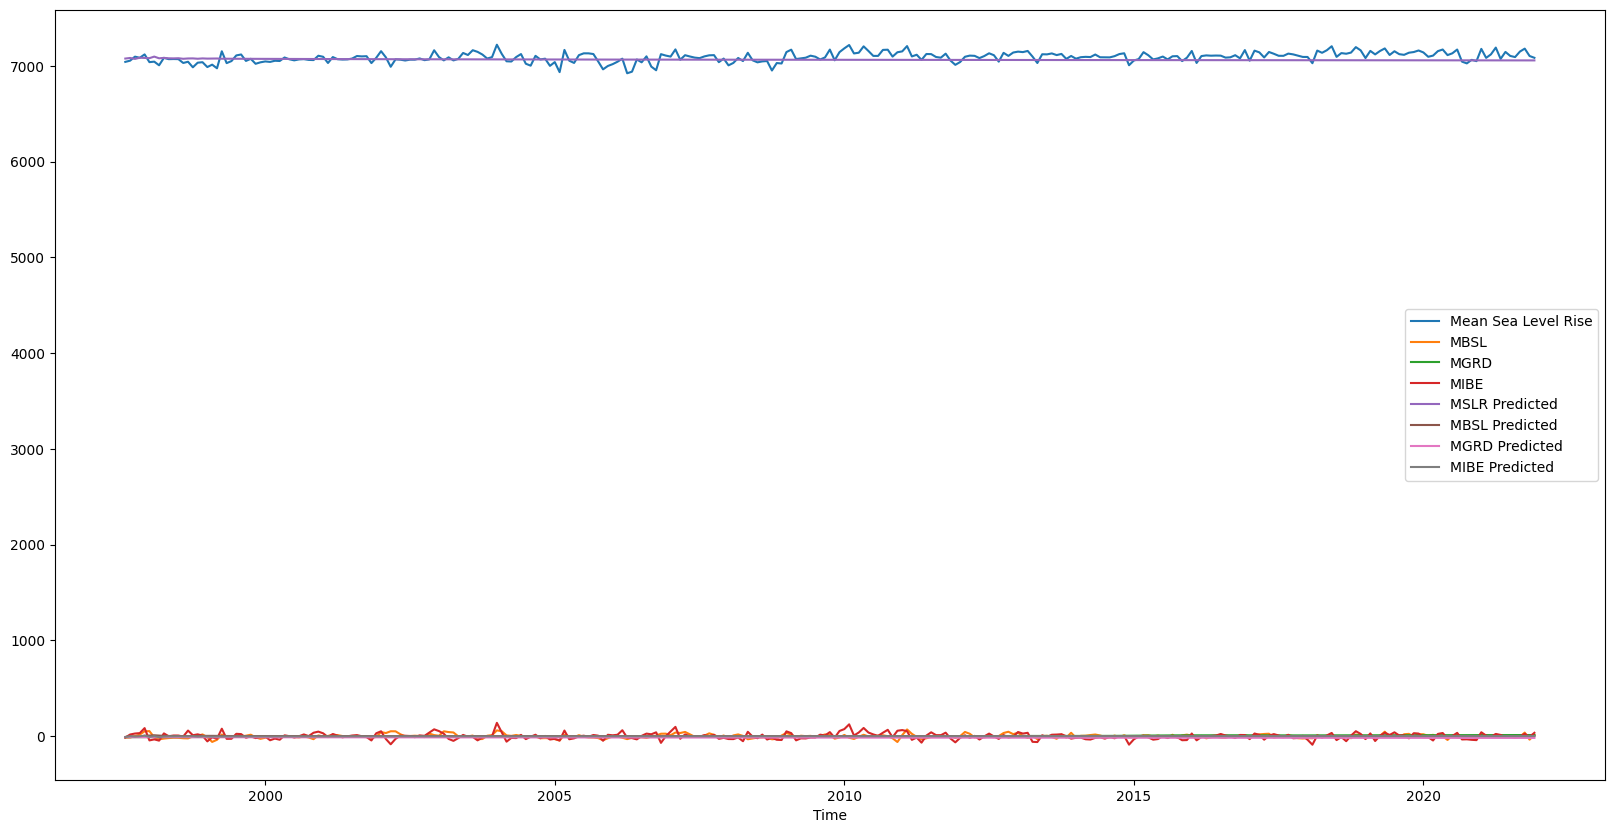

In [ ]:
testvpred = pd.concat([test_data, finalprediction], axis=1)
testvpred.plot(figsize=(20,10))

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

MSLR_ulc=math.sqrt(mean_squared_error(predictions['MSLR Predicted'],test_data['Mean Sea Level Rise']))
print('Mean value of MSLR is : {}. Root Mean Squared Error is :{}'.format(mean(test_data['Mean Sea Level Rise']),MSLR_ulc))

rmse_rgnp=math.sqrt(mean_squared_error(predictions['MGRD Predicted'],test_data['MGRD']))
print('Mean value of MGRD is : {}. Root Mean Squared Error is :{}'.format(mean(test_data['MGRD']),rmse_rgnp))

Mean value of MSLR is : 7091.847097409235. Root Mean Squared Error is :59.82734957235667
Mean value of MGRD is : 0.10059726962464285. Root Mean Squared Error is :17.921210548577008


<Axes: xlabel='Time'>

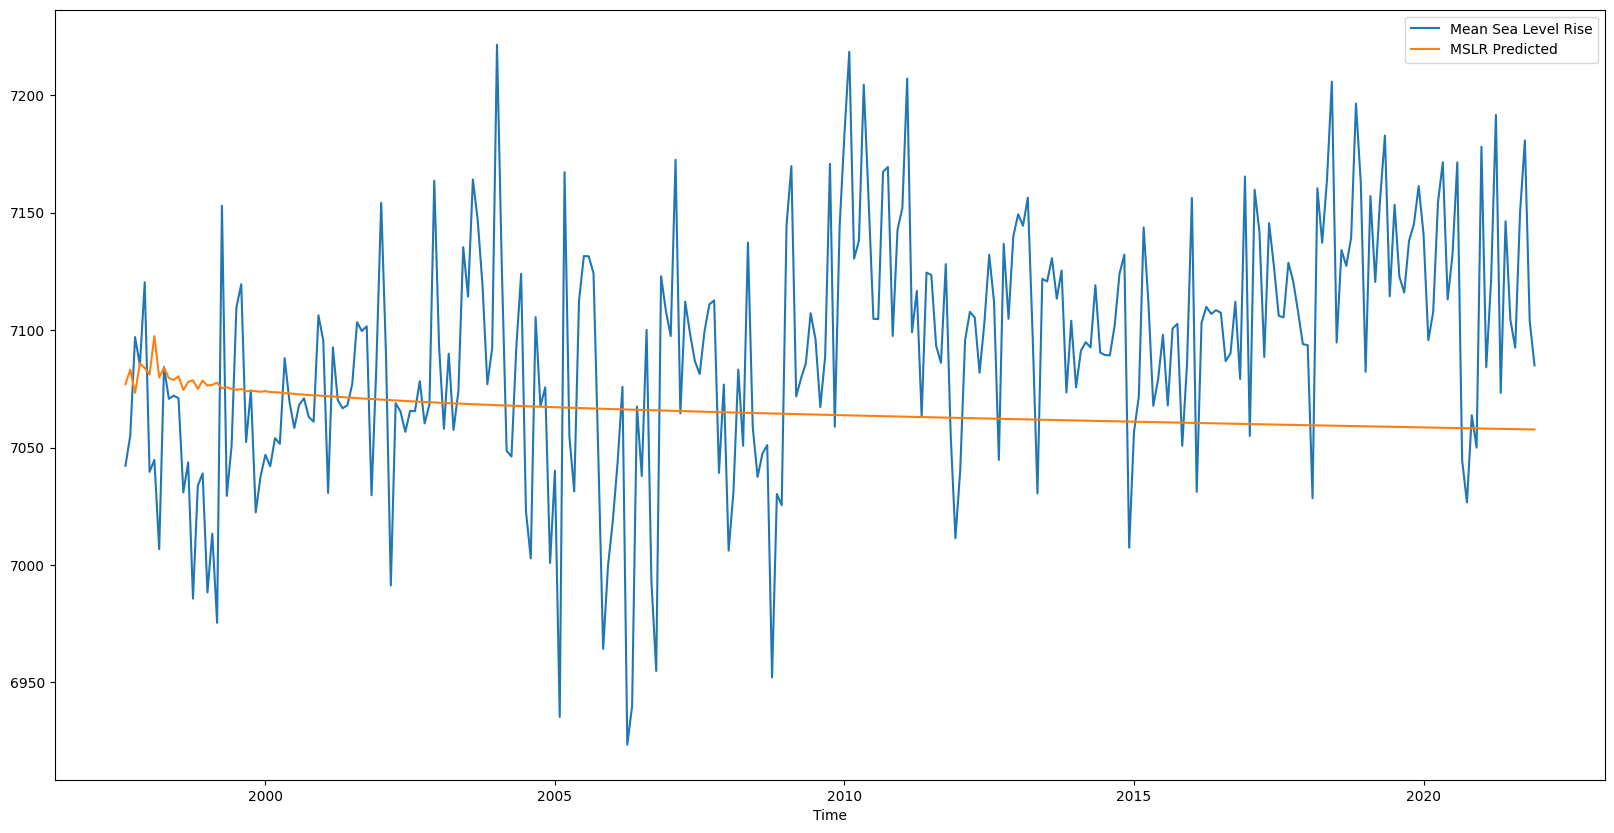

In [ ]:
test_data = test_data[["Mean Sea Level Rise"]]
finalprediction = finalprediction[["MSLR Predicted"]]
graph = pd.concat([test_data, finalprediction], axis=1)
graph.plot(figsize=(20,10))